In [1]:
from mne import io

In [2]:
raw=io.read_raw_edf('bshara4hz.edf')

Extracting edf Parameters from bshara4hz.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Ready.


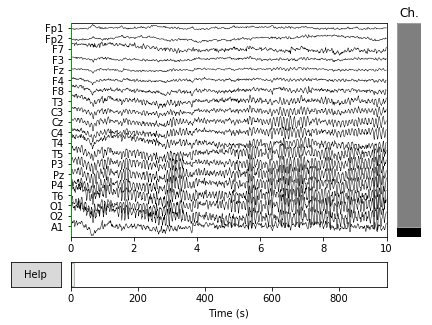

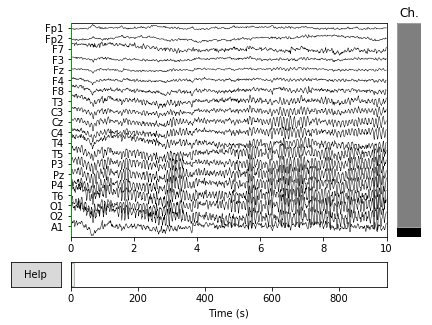

In [27]:
raw.plot(block=True, lowpass=40)

In [28]:
raw

<RawEDF  |  bshara4hz.edf, n_channels x n_times : 21 x 963584 (941.0 sec), ~48 kB, data not loaded>

In [35]:
raw.ch_names

[u'Fp1',
 u'Fp2',
 u'F7',
 u'F3',
 u'Fz',
 u'F4',
 u'F8',
 u'T3',
 u'C3',
 u'Cz',
 u'C4',
 u'T4',
 u'T5',
 u'P3',
 u'Pz',
 u'P4',
 u'T6',
 u'O1',
 u'O2',
 u'A1',
 u'A2']

(21L, 102400L)
(102400L,)


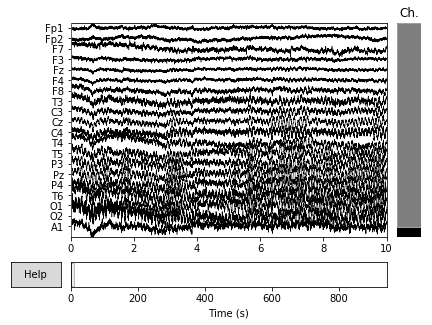

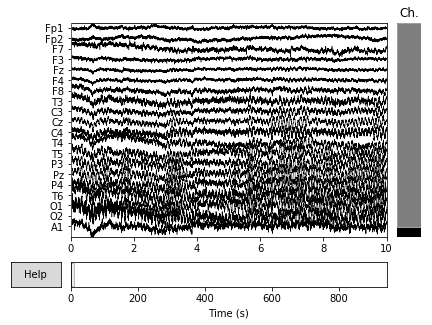

In [34]:
start, stop = raw.time_as_index([100, 200])  # 100 s to 115 s data segment
data, times = raw[:, start:stop]
print(data.shape)
print(times.shape)
data, times = raw[2:20:3, start:stop]  # access underlying data
raw.plot()

In [79]:
raw.crop(600, 720).load_data()

Reading 0 ... 122880  =      0.000 ...   120.000 secs...


<RawEDF  |  bshara4hz.edf, n_channels x n_times : 21 x 122881 (120.0 sec), ~19.7 MB, data loaded>

In [37]:
fmin, fmax = 2, 40

In [38]:
n_fft = 1024

Effective window size : 2.000 (s)


C:\Users\R\Anaconda2\lib\site-packages\mne\viz\raw.py:719: DeprecationWarning: In version 0.15 average will default to False and spatial_colors will default to True.
  'spatial_colors will default to True.', DeprecationWarning)


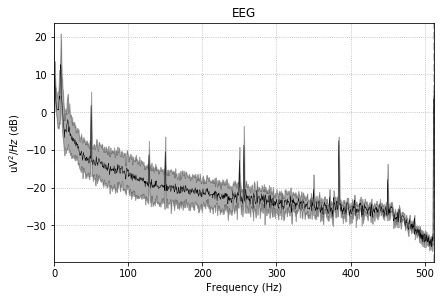

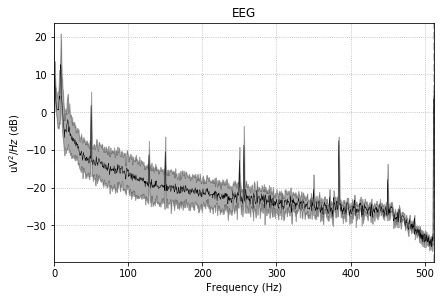

In [39]:
raw.plot_psd()

In [50]:
raw.filter(1, 40., fir_design='firwin')

Setting up band-pass filter from 1 - 40 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 3379 samples (3.300 sec) selected


<RawEDF  |  bshara4hz.edf, n_channels x n_times : 21 x 122881 (120.0 sec), ~19.7 MB, data loaded>

Effective window size : 2.000 (s)


C:\Users\R\Anaconda2\lib\site-packages\mne\viz\raw.py:719: DeprecationWarning: In version 0.15 average will default to False and spatial_colors will default to True.
  'spatial_colors will default to True.', DeprecationWarning)


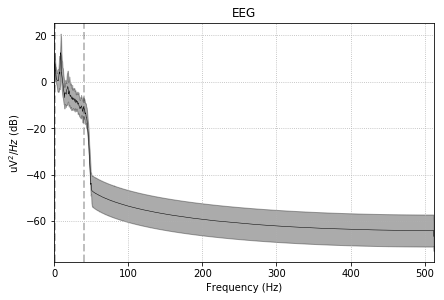

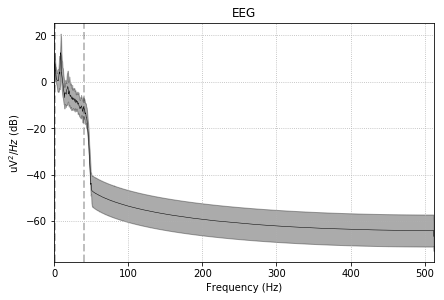

In [41]:
raw.plot_psd()

In [58]:
from mne.preprocessing import ICA
ica = ICA(method="extended-infomax", random_state=1)

In [54]:
reject = dict(mag=5e-12, grad=4000e-13)

In [69]:
ica.fit(raw)

Fitting ICA to data using 21 channels. 
Please be patient, this may take some time
Using all PCA components: 21
computing Extended Infomax ICA


<ICA  |  raw data decomposition, fit (extended-infomax): 122881 samples, 21 components, channels used: "eeg">

In [67]:
import mne
raw.set_montage(mne.channels.read_montage("standard_1020"))

<RawEDF  |  bshara4hz.edf, n_channels x n_times : 21 x 122881 (120.0 sec), ~19.7 MB, data loaded>

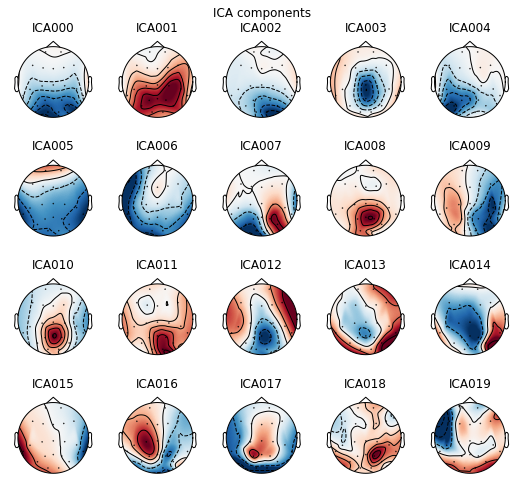

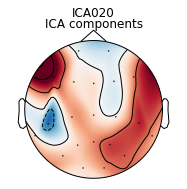

In [71]:
ica.plot_components(inst=raw)

C:\Users\R\Anaconda2\lib\site-packages\mne\viz\raw.py:719: DeprecationWarning: In version 0.15 average will default to False and spatial_colors will default to True.
  'spatial_colors will default to True.', DeprecationWarning)


Effective window size : 2.000 (s)


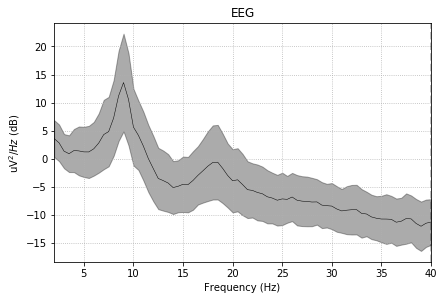

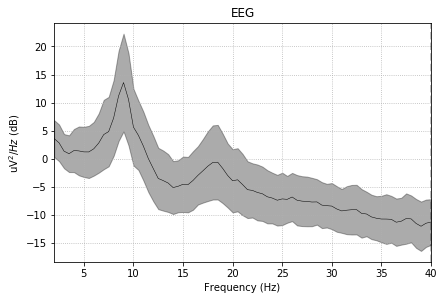

In [72]:
raw.plot_psd(fmin=2., fmax=40.)

Effective window size : 2.000 (s)


C:\Users\R\Anaconda2\lib\site-packages\mne\viz\raw.py:719: DeprecationWarning: In version 0.15 average will default to False and spatial_colors will default to True.
  'spatial_colors will default to True.', DeprecationWarning)


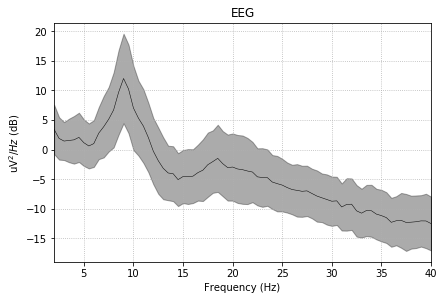

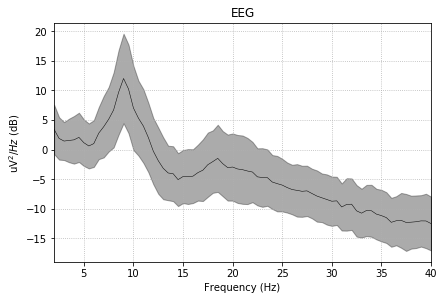

In [76]:
raw.plot_psd(fmin=2., fmax=40.)

C:\Users\R\Anaconda2\lib\site-packages\mne\viz\raw.py:719: DeprecationWarning: In version 0.15 average will default to False and spatial_colors will default to True.
  'spatial_colors will default to True.', DeprecationWarning)


Effective window size : 2.000 (s)


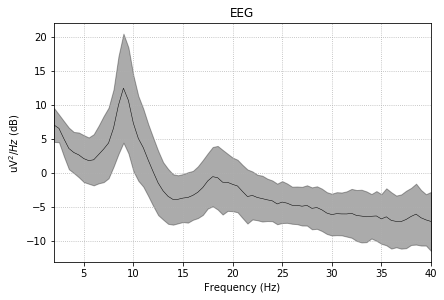

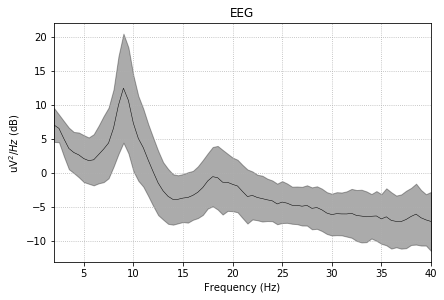

In [5]:
raw.plot_psd(fmin=2., fmax=40.)

In [93]:
import microstates

ImportError: No module named microstates

In [92]:
n_maps = 4
maps, x, gfp_peaks, gev, cv = kmeans(raw, n_maps, n_runs=10, maxerr=1e-6, maxiter=500, doplot=True)

AttributeError: 'RawEDF' object has no attribute 'shape'

In [1]:
import scipy
scipy.__version__

'1.1.0'

In [108]:
import mne

In [2]:
import microstates

In [112]:
from scipy.signal import find_peaks

ImportError: cannot import name find_peaks

In [7]:
raw.set_eeg_reference('average')

The behavior of set_eeg_reference will change in 0.16 when ref_channels="average". Currently, a projection is computed, which has to be applied manually with the apply_proj method. In 0.16, the average reference will be directly applied. Set projection=True if you want to retain the old behavior, or set projection=False if you want the new behavior.
Adding average EEG reference projection.
1 projection items deactivated


<ipython-input-7-95e500317f9d>:1: DeprecationWarning: The behavior of set_eeg_reference will change in 0.16 when ref_channels="average". Currently, a projection is computed, which has to be applied manually with the apply_proj method. In 0.16, the average reference will be directly applied. Set projection=True if you want to retain the old behavior, or set projection=False if you want the new behavior.
  raw.set_eeg_reference('average')


<RawEDF  |  bshara4hz.edf, n_channels x n_times : 21 x 963584 (941.0 sec), ~50 kB, data not loaded>

In [11]:
help(microstates)

Help on module microstates:

NAME
    microstates

FILE
    c:\users\r\microstates.py

DESCRIPTION
    Functions to segment EEG into microstates. Based on the Microsegment toolbox
    for EEGlab, written by Andreas Trier Poulsen [1]_.
    
    Author: Marijn van Vliet <w.m.vanvliet@gmail.com>
    
    References
    ----------
    .. [1]  Poulsen, A. T., Pedroni, A., Langer, N., &  Hansen, L. K. (2018).
            Microstate EEGlab toolbox: An introductionary guide. bioRxiv.

FUNCTIONS
    plot_maps(maps, info)
        Plot prototypical microstate maps.
        
        Parameters
        ----------
        maps : ndarray, shape (n_channels, n_maps)
            The prototypical microstate maps.
        info : instance of mne.io.Info
            The info structure of the dataset, containing the location of the
            sensors.
    
    plot_segmentation(segmentation, data, times)
        Plot a microstate segmentation.
        
        Parameters
        ----------
        segmenta

In [12]:
microstates.segment(raw, n_states=4, n_inits=10, max_iter=1000, thresh=1e-06, normalize=False, min_peak_dist=2, max_n_peaks=10000, random_state=None, verbose=None)

Finding 4 microstates, using 10 random intitializations


AttributeError: 'RawEDF' object has no attribute 'std'

In [14]:
maps, segmentation = microstates.segment(raw.get_data(), n_states=5)

Finding 5 microstates, using 10 random intitializations
Converged at 45 iterations.
GEV of found microstates: 0.831804
Converged at 29 iterations.
GEV of found microstates: 0.831804
Converged at 48 iterations.
GEV of found microstates: 0.831803
Converged at 24 iterations.
GEV of found microstates: 0.831809
Converged at 32 iterations.
GEV of found microstates: 0.831808
Converged at 33 iterations.
GEV of found microstates: 0.831804
Converged at 45 iterations.
GEV of found microstates: 0.831804
Converged at 30 iterations.
GEV of found microstates: 0.831804
Converged at 40 iterations.
GEV of found microstates: 0.831805
Converged at 37 iterations.
GEV of found microstates: 0.826331


In [ ]:
microstates.plot_maps(maps, raw.info)